In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# import dataset
dataset = pd.read_excel("Employee_Data.xls")
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [3]:
# Q : how many data-points and features we have ?
dataset.shape

(100, 7)

In [4]:
# Q : What are the columns name given in the dataset ?
dataset.columns

Index(['Employee Id', 'First Name', 'Last Name', 'Department', 'Age',
       'Experience', 'Salary'],
      dtype='object')

In [5]:
# Q : Does dataset have missing data ?
dataset.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

In [6]:
# Q : How much percent missing data is in the given dataset ?
dataset.isnull().sum() / len(dataset)*100

Employee Id     0.0
First Name      0.0
Last Name       0.0
Department     19.0
Age            18.0
Experience     10.0
Salary          0.0
dtype: float64

In [7]:
# Q : Check whether missing data is number or char ?
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [8]:
# Department : object - char
# approach - mode
# Age & Experience : float64 - num
# approach - 1: check outlier and then decide mean or median 

In [9]:
# copy the dataset
dataset1 = dataset.copy()
dataset1.shape

(100, 7)

# Approach no - 1 : manual

In [10]:

dataset['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [11]:
dataset['Department'] = dataset['Department'].fillna('Sales and Marketing')

In [12]:
dataset['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [13]:
dataset.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department      0
Age            18
Experience     10
Salary          0
dtype: int64

# approach no - 2 : sklearn package 

In [14]:
dataset1.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

In [15]:
x = dataset1.iloc[:,3:].values
x

array([['Sales and Marketing', 28.0, 3.0, 32889],
       ['Sales and Marketing', 22.0, 1.0, 15944],
       ['Customer Relations', 22.0, 1.0, 40343],
       ['Customer Relations', 22.0, 1.0, 19018],
       ['Accounting', 27.0, 0.0, 24795],
       ['Accounting', 26.0, 5.0, 15387],
       ['Customer Relations', 24.0, 6.0, 34117],
       ['Customer Relations', 29.0, 2.0, 16099],
       ['Sales and Marketing', 29.0, 5.0, 42105],
       ['Customer Relations', 30.0, 6.0, 11891],
       ['Accounting', 26.0, 5.0, 34687],
       ['Sales and Marketing', 26.0, 6.0, 23549],
       ['Accounting', 24.0, 5.0, 29110],
       ['Accounting', 22.0, 2.0, 33435],
       ['Sales and Marketing', 25.0, 3.0, 11830],
       ['Accounting', 25.0, nan, 44065],
       ['Customer Relations', 22.0, nan, 13266],
       ['Accounting', 25.0, nan, 16631],
       ['Accounting', 27.0, nan, 29886],
       [nan, 25.0, nan, 30464],
       [nan, 22.0, nan, 14943],
       [nan, 22.0, nan, 18632],
       [nan, 24.0, nan, 38183],


In [16]:
pd.DataFrame(x).isnull().sum()

0    19
1    18
2    10
3     0
dtype: int64

In [17]:
# sklearn to handle char missing variable
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='most_frequent')
x[:,0:1] = impute.fit_transform(x[:,0:1])

In [18]:
pd.DataFrame(x).isnull().sum()

0     0
1    18
2    10
3     0
dtype: int64

In [19]:
pd.DataFrame(x)[0].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: 0, dtype: int64

# Approach 1 - numeric variable

In [20]:
dataset.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department      0
Age            18
Experience     10
Salary          0
dtype: int64

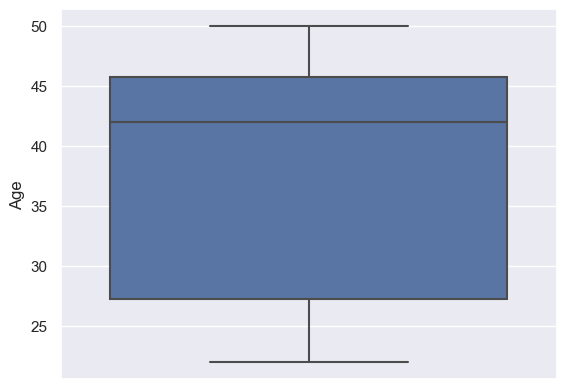

In [21]:
sns.boxplot(y='Age', data=dataset)
plt.show()

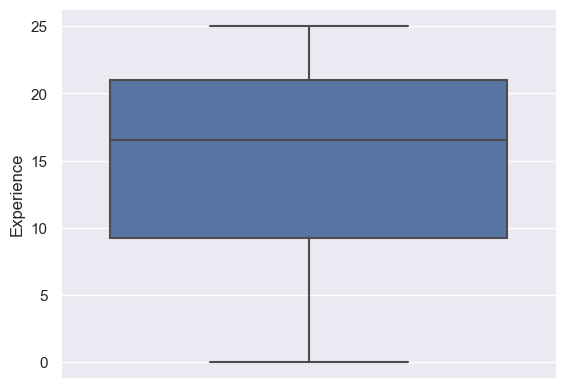

In [22]:
sns.boxplot(y='Experience', data=dataset)
plt.show()

In [23]:
dataset.describe()

,Employee Id,Age,Experience,Salary
count,100.000000,82.000000,90.000000,100.000000
mean,50.500000,37.975610,14.766667,65066.760000
std,29.011492,9.515388,6.889252,26189.874212
min,1.000000,22.000000,0.000000,11830.000000
25%,25.750000,27.250000,9.250000,48526.000000
50%,50.500000,42.000000,16.500000,73500.500000
75%,75.250000,45.750000,21.000000,86621.250000
max,100.000000,50.000000,25.000000,98180.000000


In [24]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

dataset['Experience'] = dataset['Experience'].fillna(dataset['Experience'].mean())

In [25]:
dataset.isnull().sum()

Employee Id    0
First Name     0
Last Name      0
Department     0
Age            0
Experience     0
Salary         0
dtype: int64

# Approach no 2 - sklearn concept to handle numerical missing variable

In [26]:
pd.DataFrame(x).isnull().sum()

0     0
1    18
2    10
3     0
dtype: int64

In [27]:
dataset2 = dataset.drop(['First Name','Last Name','Department'], axis=1)

In [28]:
dataset2.head(1)

,Employee Id,Age,Experience,Salary
0,1,28.0,3.0,32889


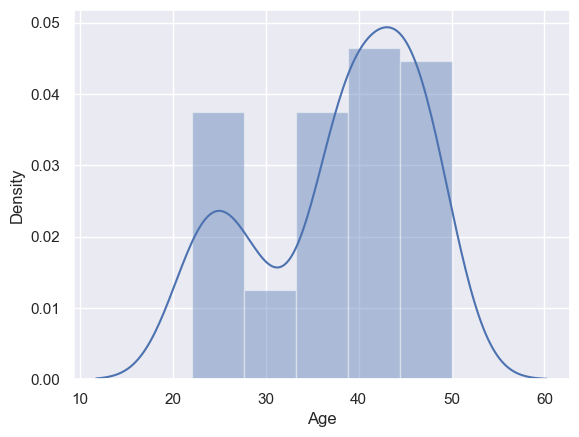

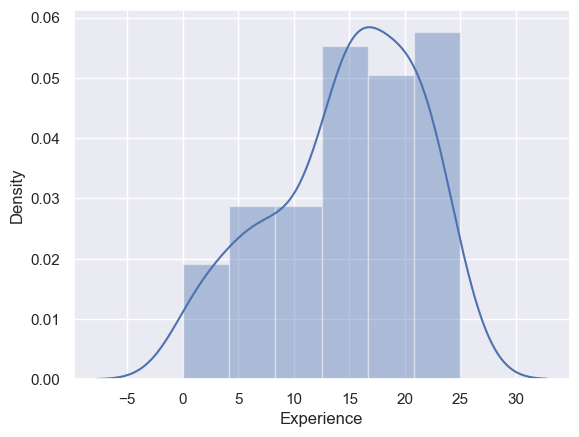

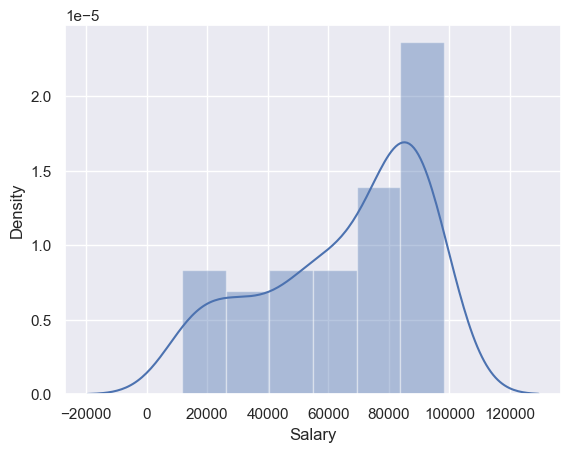

In [29]:
# How to check outlier with all variable at one go
def distplots(col):
    sns.distplot(dataset2[col])
    plt.show()
    
for i in list(dataset2.columns)[1:]:
    distplots(i)

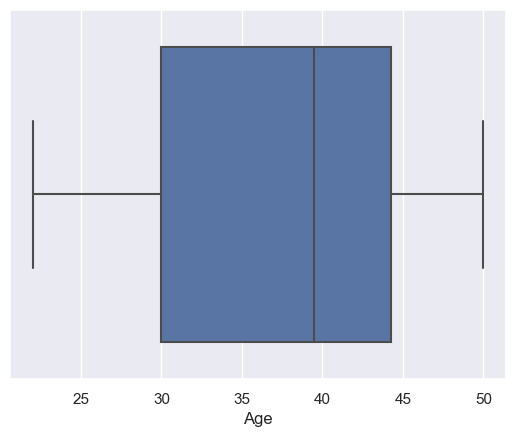

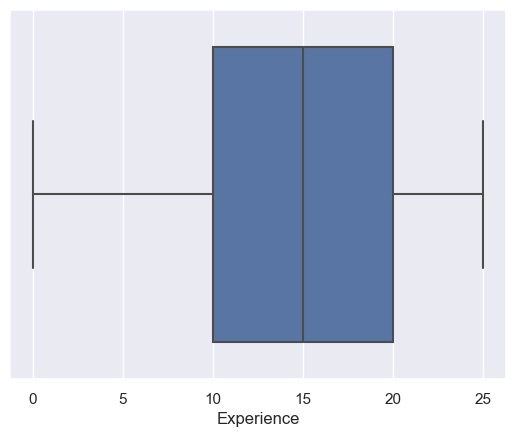

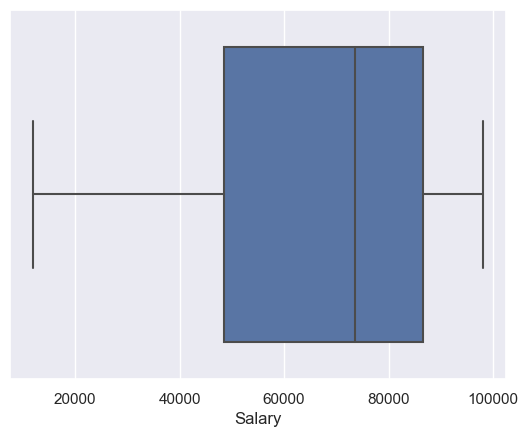

In [30]:
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)

In [31]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='mean')
x[:,1:3] = impute.fit_transform(x[:,1:3])

In [32]:
pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

# Encoding concept

### part 1 : label encoder

In [33]:
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [34]:
dataset['Department'] = dataset['Department'].astype('category')
dataset['Department'] = dataset['Department'].cat.codes

In [35]:
dataset.head(10)

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,2,28.0,3.0,32889
1,2,Sheila,Garza,2,22.0,1.0,15944
2,3,John,Bryant,1,22.0,1.0,40343
3,4,Christian,Farley,1,22.0,1.0,19018
4,5,Colorado,Bowen,0,27.0,0.0,24795
5,6,Elijah,Matthews,0,26.0,5.0,15387
6,7,Bo,Mcleod,1,24.0,6.0,34117
7,8,Zena,Melendez,1,29.0,2.0,16099
8,9,Tucker,Michael,2,29.0,5.0,42105
9,10,Lucas,Rowe,1,30.0,6.0,11891


# One_Hot_Encoder concept

In [36]:
# approach no. 1

In [37]:
dataset = pd.get_dummies(dataset, columns=['Department'])

In [38]:
dataset.head()

,Employee Id,First Name,Last Name,Age,Experience,Salary,Department_0,Department_1,Department_2
0,1,Joy,Bass,28.0,3.0,32889,0,0,1
1,2,Sheila,Garza,22.0,1.0,15944,0,0,1
2,3,John,Bryant,22.0,1.0,40343,0,1,0
3,4,Christian,Farley,22.0,1.0,19018,0,1,0
4,5,Colorado,Bowen,27.0,0.0,24795,1,0,0


In [39]:
dataset1.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [40]:
pd.DataFrame(x).head()

,0,1,2,3
0,Sales and Marketing,28.0,3.0,32889
1,Sales and Marketing,22.0,1.0,15944
2,Customer Relations,22.0,1.0,40343
3,Customer Relations,22.0,1.0,19018
4,Accounting,27.0,0.0,24795


In [41]:
pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

# Encoding method by using sklearn

In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# label encoder
encoding = LabelEncoder()
x[:,0] = encoding.fit_transform(x[:,0])

In [45]:
pd.DataFrame(x).head(10)

,0,1,2,3
0,2,28.0,3.0,32889
1,2,22.0,1.0,15944
2,1,22.0,1.0,40343
3,1,22.0,1.0,19018
4,0,27.0,0.0,24795
5,0,26.0,5.0,15387
6,1,24.0,6.0,34117
7,1,29.0,2.0,16099
8,2,29.0,5.0,42105
9,1,30.0,6.0,11891


In [46]:
# one hot encoder
columntransfer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')

In [47]:
columntransfer

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [0])])

In [48]:
x = columntransfer.fit_transform(x)

In [51]:
pd.DataFrame(x).dtypes

0    object
1    object
2    object
3    object
4    object
5    object
dtype: object

In [52]:
pd.DataFrame(x).head()

,0,1,2,3,4,5
0,0.0,0.0,1.0,28.0,3.0,32889
1,0.0,0.0,1.0,22.0,1.0,15944
2,0.0,1.0,0.0,22.0,1.0,40343
3,0.0,1.0,0.0,22.0,1.0,19018
4,1.0,0.0,0.0,27.0,0.0,24795


# Feature scaling 
## Normalization and Standarization

# part 1 : Standarization

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_fs_sc = sc.fit_transform(x)
pd.DataFrame(x_fs_sc)

,0,1,2,3,4,5
0,-0.608164,-0.561951,1.020204,-1.164851,-1.810449,-1.234823
1,-0.608164,-0.561951,1.020204,-1.865471,-2.118174,-1.885089
2,-0.608164,1.779513,-0.980196,-1.865471,-2.118174,-0.948776
3,-0.608164,1.779513,-0.980196,-1.865471,-2.118174,-1.767124
4,1.644294,-0.561951,-0.980196,-1.281621,-2.272037,-1.545431
...,...,...,...,...,...,...
95,-0.608164,-0.561951,1.020204,1.053777,1.112939,0.537644
96,-0.608164,-0.561951,1.020204,0.937007,0.805214,0.618615
97,-0.608164,1.779513,-0.980196,0.703468,0.497489,0.720693
98,-0.608164,1.779513,-0.980196,1.053777,1.112939,0.924503


In [56]:
# Normalization
from sklearn.preprocessing import Normalizer
nor = Normalizer()
x_fs_nor = nor.fit_transform(x[])
pd.DataFrame(x_fs_nor)

,0,1,2,3,4,5
0,0.000000,0.000000,0.000030,0.000851,0.000091,1.000000
1,0.000000,0.000000,0.000063,0.001380,0.000063,0.999999
2,0.000000,0.000025,0.000000,0.000545,0.000025,1.000000
3,0.000000,0.000053,0.000000,0.001157,0.000053,0.999999
4,0.000040,0.000000,0.000000,0.001089,0.000000,0.999999
...,...,...,...,...,...,...
95,0.000000,0.000000,0.000013,0.000594,0.000278,1.000000
96,0.000000,0.000000,0.000012,0.000567,0.000246,1.000000
97,0.000000,0.000012,0.000000,0.000525,0.000215,1.000000
98,0.000000,0.000011,0.000000,0.000527,0.000247,1.000000
